> # **Iris Dataset**
* Iris is a genus of species of flowering plants with showy flowers.
* The iris species here studied, **setosa**, **versicolor** and **virginica** share a similar color: dark violet/blue.
* A way to distinguish visually the species among them is through their petals and sepals dimensions (lenght and width).

> **The first step is to import _Seaborn_ Library and then load the iris dataset from it.**

Differently from the Scikit-Learn that loads the dataset as arrays, Seaborn load it as Panda's Dataframe what saves some steps to build the dataframe, and so, some lines of codes.

In [42]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [43]:
type(iris)

pandas.core.frame.DataFrame

The method **sample** of a Panda's Dataframe is great way to visualize how the data is stored, like the features and the kind of data of them, with random samples of the Dataframe, non ordered.  

In [44]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
141,6.9,3.1,5.1,2.3,virginica
28,5.2,3.4,1.4,0.2,setosa
67,5.8,2.7,4.1,1.0,versicolor
101,5.8,2.7,5.1,1.9,virginica
10,5.4,3.7,1.5,0.2,setosa


There are 4 categories listed: "sepal length (cm)", "sepal width (cm)", "petal length (cm)" and "petal width (cm)".

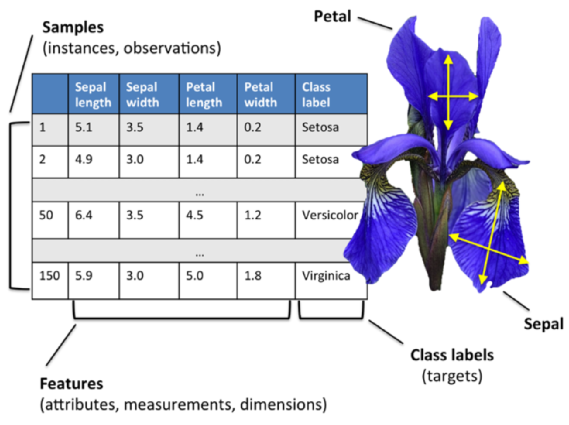

In [ ]:
# from IPython.display import Image
# Image(filename ="iris-data-set.png", width=500, height=350)

In [45]:
import pandas as pd

In [46]:
pd.value_counts(iris.species)

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

The dataset is made of 150 flowers (150 rows), 50 of each specie.

> # **Exploratory Analysis through Charts**

**Seaborn** is a Python data visualization library based on **Matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.


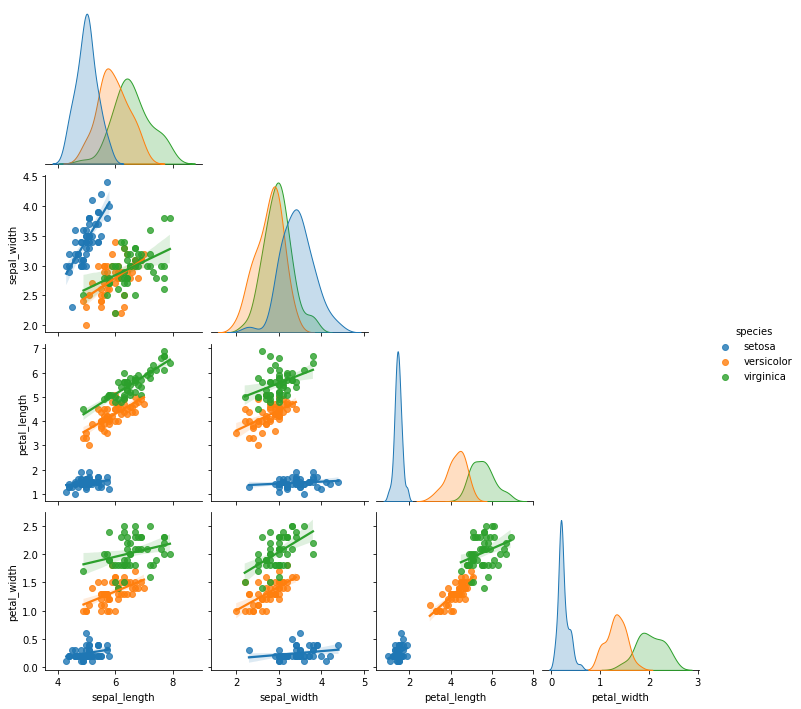

In [47]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

# **MACHINE LEARNING - Predictive Analysis**

After **performing the exploratory** analysis, what is basically, evaluate and reaching some conclusions looking to the charts of distribution and scatter of the data.

Now, the predictive analysis is going to be performed not by a person itself but with the aid of a computer, mathematical algorithms, **machine learning**.

The problem is going to be solved through the **KNN** algorithm. The best pratices are going to be performed and explained.

Scikit-learn is the library used here for machine learning in Python. From it several modulus are imported as needed.

> *Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.*

> # **TRAIN and TEST Data**

The first step to perform a predictive analysis through a Machine Learning algorithm is to separate the data in two parts. One to be **trained**, so the coeficients are calculated to the best fit to this data, according to the algorithm chosen. The second part is reserved to be **tested**, so it is possible to ***evaluate the accuracy*** of the method with a different data, so that you can extrapolate to any data.

> This selection, of which part of the data is to be used as train and test is very important. We are going to use **70% as train** and **30% as test**. It is safe not to pick any skewed data to make it randomly. 

> ***Scikit-learn*** has a very good method for this, **train_test_split**; however, everytime you run this method it returns different samples as it makes it ramdomly, what would make the same problem impossible to replicate. The selection of the data can produces slight different results to the algorithm.**

> ***Panda*** has a solution for this, through a seeded random split of the database. The method **sample** set with **random_state=500** would meake it replicable by anyone. You are free to test with a different number, or even with *train_test_split*.

> The final result is:

>>*   **X_train** and **y_train** **-** for training, data and target, respectively
>>*   **X_test** **-** data for predicting with the algorithm
>>*   **y_test** **-** target for validation the model



In [48]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [49]:
test = iris.drop(train.index)

In [50]:
X_train = train.drop(labels='species', axis=1)

In [51]:
y_train = train.species

In [52]:
X_test = test.drop(labels='species', axis=1)

In [53]:
y_test = test.species

> **later was checked in the documentation, and the train_test_split method also has a seeded random split method, yet not the same, so same seed represents different data from Panda's sample method.

> Follows the option to use the train_test_split: simple, one line code:

>>>**from** sklearn.model_selection **import** train_test_split

>>>X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )

> Following is a sample of the first 5 rows of the train data after being splitted.

* Every time the *train_test_split* method is run a *different sample* for test and train is selected as it works randomly with the data. Like this, everytime you have a different train data the performance can differ. To minimize this issue some techniques for training/testing with different parts of the dataset is recommended; this is called **cross validation** and is going to be used further ahead.

In [54]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


> Following, the shapes of the splitted data.

In [55]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

105 rows and 4 columns for the train against 45 rows (30%) and 4 columns for the test.

In [56]:
y_train.shape,y_test.shape

((105,), (45,))

105 rows for the train against 45 rows for the test, to the targets.

# **KNN - K Nearest Neighbors***

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

> * In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

*from [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). 

> ## **Instantiating the KNN Algorithm**

The KNN Classifier (KNeighborsClassifier) is imported from Scikit-learn.

The **KNeighborsClassifier** has some parameters to improve to improve its performance. At first only n_neighbors is going to be set, the others are to be as default. Later, an optimization analysis could be performed to adjust them.



In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors is set to be 3, what means it will take the specie classification to the average of three closest data.

> ## **Trainning the KNN algorithm**

At this step the algorithm is trained to estimate the best representative function for the data, according to the parameters being used.

**Fit** is the method to adjust the classifier to the data.

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Before predicting the results, it is possible to have the estimate mean accuracy on the given test data and labels. 

In [60]:
knn.score(X_test,y_test)

0.9555555555555556

> ## **Predicting with the Test Data and the KNN Algorithm**

With the algorithm trained and the function stablished it is possible to get the first results predicting against the test data (X_test).

**Predict** is the method to infer results from any data compatible to the ones of the train.

In [61]:
results = knn.predict(X_test)

This is the list of predicted specie of iris from the 45 samples in the **X_test** dataset. To validate the function the result should be matched against the authentic values, represented by **y_test**.

> ## **Classification Metrics**

With the **Metrics**, the calculated **precision** and **recall** of each specie is shown in tabular presentation.

The **f1-score** represents a weighted average between these two metrics. This is a great metric for not taking into account the True negatives that generally are irrelevant to the results.

The accuracy shows the fidelity of the algorithm in overall.

In [62]:
from sklearn import metrics

In [63]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



The accuracy shown is the same from the knn method score, 95,6%.

># **Optimizing the Parameter K (n_neighbors)**

> ## **Defining a List for Parameter K**

It is possible with the **GridSearch Objetc** to optimize the parameters of a classifier.

For the classification of the best parameters the Cross Validation Metrics shows up as a great metrics for the reasons formerly explained.

The **parameter K** from KNN was set as 3 initially without any criteria.

This parameter is going to be optimized. Initially a list of possible k factors is created, from 1 to 30.

In [64]:
k_list = list(range(1,31))

In [65]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ## **Instantiating the GridSearch Object**

The **GridSearch Objetc** performs an exhaustive search over specified parameter values for an estimator.

Its process performs in-built **fit** and **predict** methos, together with the **Cross Validation** Strategie.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

> ## **Training the GridSearch Object**

In [68]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

> The best accuracy with the lowest k is as follows. 

In [72]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 6} with 0.9800000000000001 of accuracy.


In [ ]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 6}, highest mean accuracy along with the cross validation = 0.9800000000000001 and lowest standard deviation = 0.016329931618554516


> Following, the **classifier itself** with it better set.

> ## **Charts**

Graphically, the list of results of the k number of neighbors versus the accuracy. 

In [ ]:
import matplotlib.pyplot as plt

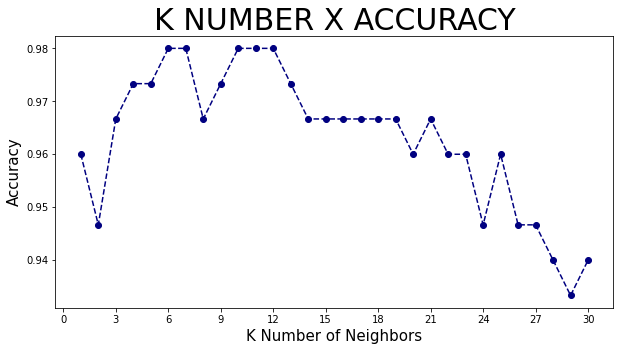

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()